In [1]:
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from xgboost import XGBRegressor 
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

In [2]:
# Define the data types for each column
data_types = {
    'nameFull':'str',
    'bookingNumber':'str',
    'caseNumber':'str',
    'inmateNumber':'str',
    'housing1':'str',
    'housing1a':'str',
    'housing2':'str',
    'housing3': 'str',
    'nameLast':'str',
    'nameFirst':'str',
    'nameMiddle':'str',
    'age': 'float',
    'sex': 'category',
    'race': 'category',
    'eyeColor': 'category',
    'hairColor': 'category',
    'height': 'float',
    'weight': 'float',
    'bond': 'float',
    'bail': 'float',
    'topcharge': 'category',
    'county':'category',
    'Top Poliytical': 'category'
}

# Specify which columns should be parsed as datetime
date_columns = ['date', 'bookingDate', 'dob', 'firstappearance']
df = pd.read_csv('CensusJDI.csv',dtype= data_types, parse_dates = date_columns)
df.dropna(subset=['nameFull'], inplace=True)

In [3]:
import pandas as pd

# Sort the dataset by 'nameFull' and 'firstappearance'
df = df.sort_values(['nameFull', 'firstappearance'])

# Calculate the difference between 'date' and the next 'firstappearance' for each individual
df['time_gap'] = df.groupby('nameFull')['firstappearance'].shift(-1) - df['date']

# Convert the 'time_gap' column to string
df['time_gap'] = df['time_gap'].astype(str)
df['time_gap'] = df['time_gap'].str.replace(' days', '', regex=False)

# Replace "NaT" with 0 in the 'time_gap' column
df['time_gap'] = df['time_gap'].replace('NaT', 0)

# Convert the 'time_gap' column to integers
df['time_gap'] = df['time_gap'].astype(int)

incarceration_count = {}

for index, row in df.iterrows():
    name = str(row['nameFull']).strip() if not pd.isna(row['nameFull']) else None
    if name:
        if name in incarceration_count:
            incarceration_count[name] += 1
        else:
            incarceration_count[name] = 1

# Create a new column 'incarcerated_counts' based on the counts
df['incarcerated_counts'] = df['nameFull'].apply(lambda x: incarceration_count.get(str(x).strip(), 0) 
                                                 if not pd.isna(x) else 0)

# Add a new column reincarcerated base on reincarcerated_counts
df['reincarceration'] = df['incarcerated_counts'].apply(lambda x: 1 if x > 1 else 0)

In [18]:
display(reincarcerations_count[reincarcerations_count['reincarcerations_different_county']==1].head(10))

,nameFull,county,reincarcerations_different_county
100,AARON ALLEN,2,1
109,AARON ANDREW BEARDSLEY,3,1
143,AARON ARENIVAZ,2,1
163,AARON BENJAMIN LEWIS,2,1
187,AARON BROWN,5,1
210,AARON CAMPOS,2,1
227,AARON CHAVEZ,2,1
249,AARON CHRISTOPHER SMITH,2,1
254,AARON CLARK,2,1
279,AARON D MUDRICH,2,1


In [4]:
import pandas as pd

# Assuming you have your data in a DataFrame called df
# You can first group the data by 'nameFull' and count unique 'county' values for each group
reincarcerations_count = df.groupby('nameFull')['county'].nunique().reset_index()

# Create a new column 'reincarcerations_different_county' based on the count
reincarcerations_count['reincarcerations_different_county'] = (reincarcerations_count['county'] > 1).astype(int)

# Merge the result back into the original DataFrame based on 'nameFull'
df = df.merge(reincarcerations_count[['nameFull', 'reincarcerations_different_county']], on='nameFull', how='left')

# If a 'nameFull' value is repeated in different counties, the corresponding
# 'reincarcerations_different_county' value will be 1; otherwise, it will be 0.
display(df)

,nameFull,bookingNumber,bookingDate,caseNumber,inmateNumber,housing1,housing1a,housing2,housing3,nameLast,...,Female Unemp %,LTHS Unemp %,HS Unemp %,SC/AD Unemp %,Bach./Higher Unemp %,Top Political,time_gap,incarcerated_counts,reincarceration,reincarcerations_different_county
0,(J) BENJAMIN HAYES,NaN,2022-09-24,NaN,202201668.0,Napa Co. Jail,NaN,NaN,NaN,NaN,...,4.7,5.7,3.6,4.3,3.4,D,0,1,0,0
1,A ALEXANDER BARRY,6099253.0,NaT,NaN,NaN,Unknown,NaN,NaN,NaN,barry,...,6.8,6.8,6.9,6.6,5.0,D,0,1,0,0
2,A D WEBB,so2294642,NaT,NaN,NaN,Kern County Central Receiving Facility; Kern C...,NaN,NaN,NaN,webb,...,8.2,10.0,9.9,6.9,2.6,R,450,2,1,0
3,A D WEBB,so2322685,NaT,NaN,NaN,Kern County Central Receiving Facility; Kern C...,NaN,NaN,NaN,webb,...,8.2,10.0,9.9,6.9,2.6,R,0,2,1,0
4,A D WEBB JR,so2334382,NaT,NaN,NaN,Kern County Central Receiving Facility; Kern C...,NaN,NaN,NaN,webb,...,8.2,10.0,9.9,6.9,2.6,R,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601256,ZYRC DAVIS JR,202123900,2021-06-17,210016757,NaN,robert presley detention cente,NaN,NaN,23c8,NaN,...,7.1,7.9,7.3,5.7,3.8,D,0,1,0,0
601257,ZYRON NEWHOUSE,6285273,NaT,NaN,40113763,Unknown,NaN,NaN,NaN,newhouse,...,6.8,6.8,6.9,6.6,5.0,D,0,1,0,0
601258,ZYSEAN RAY WAFER,22-003686,2022-08-16,NaN,41599,Kings Co. Jail; Kings County Branch Jail,NaN,NaN,NaN,NaN,...,10.0,12.9,8.3,7.3,3.6,R,17,2,1,0
601259,ZYSEAN RAY WAFER,22-004084,NaT,NaN,41599,Kings Co. Jail; Kings County Branch Jail,NaN,NaN,NaN,wafer,...,10.0,12.9,8.3,7.3,3.6,R,0,2,1,0


# Average Rate of Re-Incarceration

Taking into consideration that some counties have shorter period of time compared to others, we introduce the idea of "length of exposure" per county when calculating re-incarceration rate.

The calculated average number of re-incarcerations is subject to the duration of observation of jail data. It is essential to acknowledge that a person's likelihood of being observed as re-incarcerated is influenced by the length of time the jail data is available. To address this, we can introduce the concept of 'length of exposure' per county. This refers to the duration of time for which the jail data is actively recorded and available for analysis.

By incorporating the 'length of exposure' metric into our analysis, we can normalize the re-incarceration rates, providing a more comprehensive perspective on the observed averages. This approach allows us to account for the varying timeframes of data collection across different counties, resulting in a more accurate comparison of re-incarceration rates that considers the length of time each county has been under observation

In [5]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Filter the DataFrame for individuals with reincarceration = 1
reincarcerated_df = df[df['reincarceration'] == 1]

# Calculate the total reincarcerated counts for each county
county_reincarceration = reincarcerated_df.groupby('county')['reincarceration'].sum()

# Calculate the total counts of individuals for each county
county_total_counts = df.groupby('county')['nameFull'].nunique()

# Calculate the length of exposure for each county
county_exposure_duration = df.groupby('county')['month'].nunique().multiply(
    df.groupby('county')['year'].nunique())

# Calculate the rate of re-incarceration per month for each county
rate_of_reincarceration_by_county = county_reincarceration / county_total_counts #* county_exposure_duration)

# Print the results
print("Rate of Re-Incarceration for each county:")
print(rate_of_reincarceration_by_county)

Rate of Re-Incarceration for each county:
county
Monterey           0.677559
Santa Cruz         1.048047
Tulare             1.077646
Madera             0.812366
Calaveras          0.776699
San Francisco      0.823202
Marin              0.684194
Shasta             1.077048
Merced             0.890463
Santa Barbara      0.686750
Orange             1.020536
Sutter             0.752927
Kern               0.704130
Lake               1.169112
San Mateo          0.887965
Los Angeles        0.532777
Mono               0.542199
Placer             0.690320
Amador             0.899874
El Dorado          0.623001
Inyo               1.005650
Kings              0.886902
Humboldt           0.762534
Mendocino          0.878861
Napa               1.059979
Solano             0.797951
San Luis Obispo    0.509218
Riverside          0.692310
Yuba               0.983939
Fresno             1.035748
Siskiyou           0.873587
Mariposa           0.785331
Nevada             0.946124
Tehama             0.627727

Rate of Re-incarceration without "length of exposure"

In [6]:
# Filter the DataFrame for individuals with reincarceration = 1
reincarcerated_df = df[df['reincarceration'] == 1]

# Calculate the total reincarcerated counts for each county
county_reincarceration = reincarcerated_df.groupby('county')['reincarceration'].sum()

# Calculate the total counts of individuals for each county
county_total_counts = df.groupby('county')['nameFull'].nunique()

# Calculate the rate of re-incarceration for each county
rate_of_reincarceration_by_county = county_reincarceration / county_total_counts

# Print the results
print("Rate of Re-Incarceration for each county:")
print(rate_of_reincarceration_by_county)

Rate of Re-Incarceration for each county:
county
Monterey           0.677559
Santa Cruz         1.048047
Tulare             1.077646
Madera             0.812366
Calaveras          0.776699
San Francisco      0.823202
Marin              0.684194
Shasta             1.077048
Merced             0.890463
Santa Barbara      0.686750
Orange             1.020536
Sutter             0.752927
Kern               0.704130
Lake               1.169112
San Mateo          0.887965
Los Angeles        0.532777
Mono               0.542199
Placer             0.690320
Amador             0.899874
El Dorado          0.623001
Inyo               1.005650
Kings              0.886902
Humboldt           0.762534
Mendocino          0.878861
Napa               1.059979
Solano             0.797951
San Luis Obispo    0.509218
Riverside          0.692310
Yuba               0.983939
Fresno             1.035748
Siskiyou           0.873587
Mariposa           0.785331
Nevada             0.946124
Tehama             0.627727

In [7]:
# Calculate the average reincarcerated count for the 35 counties
average_reincarceration = rate_of_reincarceration_by_county.sum() / 25

print("Average Rate of Re-Incarceration:", average_reincarceration)

Average Rate of Re-Incarceration: 1.1723286633247725


# Average Duration out of Jails

In [6]:
# Calculate the total reincarcerated counts for each county
county_time_gap = df.groupby('county')['time_gap'].sum()

# Calculate the total counts of individuals for each county
county_total = df.groupby('county')['nameFull'].nunique()

# Calculate the average reincarcerated count for each county
average_time_gap_by_county = county_time_gap / county_total

# Print the results
print("Average Duration out of Jails for each county:")
print(average_time_gap_by_county)

Average Duration out of Jails for each county:
county
Monterey            92.136767
Santa Cruz         119.015809
Tulare             148.108605
Madera              97.508333
Calaveras           53.198490
San Francisco       59.117716
Marin               90.529516
Shasta             167.506211
Merced             113.492916
Santa Barbara       90.456639
Orange              92.842998
Sutter              62.088993
Kern                71.296311
Lake               155.054802
San Mateo           88.116778
Los Angeles         28.663508
Mono                44.439898
Placer              86.217684
Amador             109.084383
El Dorado           85.527037
Inyo                71.459510
Kings              124.975473
Humboldt            62.246951
Mendocino           64.848576
Napa               135.056777
Solano              88.853622
San Luis Obispo     26.076696
Riverside           51.495449
Yuba               134.268597
Fresno             130.369039
Siskiyou           125.470709
Mariposa        

In [11]:
# Calculate the average reincarcerated count for the 35 counties
average_duration_out_of_jails = average_time_gap_by_county.sum() / 35

print("Average Duration out of Jails:", average_duration_out_of_jails)

Average Duration out of Jails: 94.81836412408124


# PCA for features selection

#### PCA with one-hot encoding for Categorical variables

In [17]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming df is your original DataFrame

# Convert date-related columns to datetime
# date_columns = ['bookingDate', 'dob', 'firstappearance', 'date']
# for col in date_columns:
#     df[col] = pd.to_datetime(df[col], errors='coerce')

# Select the relevant columns for PCA and XGBoost
selected_columns = ['age', 'dob', 'sex', 'race',
       'eyeColor', 'hairColor', 'height', 'weight', 'bond', 'bail',
       'topcharge', 'firstappearance', 'county', 'date', 'incarcerated_days',
       'Population', 'Asian Pop', 'Black Pop', 'Hispanic Pop', 'White Pop',
       'Native Pop', 'Multi-Race Pop', 'Other Pop', 'Avg Hsld Size',
       'Avg Fam Size', 'Owned Housing', 'Rented Housing', 'Health Cov',
       'No Health Cov', 'Med Monthly Housing', 'Poverty %', 'Male Poverty %',
       'Female Poverty %', 'White Poverty %', 'Black Poverty %',
       'Native Poverty %', 'Asian Poverty %', 'Other Poverty %',
       'Hispanic Poverty %', 'Multi-Race Poverty %', 'Black Unemp %',
       'Native Unemp %', 'Asian Unemp %', 'Other Unemp %',
       'Multi-Race Unemp %', 'Hispanic Unemp %', 'White Unemp %',
       'Male Unemp %', 'Female Unemp %', 'LTHS Unemp %', 'HS Unemp %',
       'SC/AD Unemp %', 'Bach./Higher Unemp %', 'Top Political']

# Extract the selected columns
X = df[selected_columns].copy()

# Convert categorical columns to one-hot encoding
categorical_columns = ['sex', 'race', 'eyeColor', 'hairColor', 'county', 'topcharge']
X = pd.get_dummies(X, columns=categorical_columns)

# Convert to numeric and handle missing values
X = X.apply(pd.to_numeric, errors='coerce')  
X.fillna(0, inplace=True)  

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
n_components = 2  
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(X_scaled)

# Access the loadings (coefficients) for each feature in the principal components
loadings = pca.components_

# Create a DataFrame to show the feature loadings for each component
loadings_df = pd.DataFrame(data=loadings, columns=X.columns, index=['PC1', 'PC2'])


In [18]:
# Set pandas display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Find the principal component with the highest loading for each variable
max_loading_components = loadings_df.abs().idxmax()

# Print the results
print("Variable-to-Principal Component Mapping:")
print(max_loading_components)

# Reset pandas display options to the default values if needed
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

Variable-to-Principal Component Mapping:
age                       PC2
dob                       PC2
height                    PC2
weight                    PC1
bond                      PC2
bail                      PC2
firstappearance           PC2
date                      PC2
incarcerated_days         PC2
Population                PC2
Asian Pop                 PC1
Black Pop                 PC2
Hispanic Pop              PC2
White Pop                 PC2
Native Pop                PC2
Multi-Race Pop            PC2
Other Pop                 PC1
Avg Hsld Size             PC1
Avg Fam Size              PC2
Owned Housing             PC2
Rented Housing            PC2
Health Cov                PC2
No Health Cov             PC2
Med Monthly Housing       PC1
Poverty %                 PC1
Male Poverty %            PC1
Female Poverty %          PC1
White Poverty %           PC1
Black Poverty %           PC1
Native Poverty %          PC1
Asian Poverty %           PC1
Other Poverty %           PC1

- PC1: This component seems to capture features related to various socio-economic factors and political indicators. Variables such as 'Poverty %', 'Male Poverty %', 'Female Poverty %', 'White Poverty %', 'Black Poverty %', 'Native Poverty %', 'Asian Poverty %', 'Other Poverty %', 'Hispanic Poverty %', 'Multi-Race Poverty %', 'Bach./Higher Unemp %', 'Top Political', and others have relatively higher loadings on PC1.

- PC2: This component appears to capture features related to demographic information, incarceration details, and population statistics. Variables such as 'age', 'dob', 'height', 'weight', 'bond', 'bail', 'firstappearance', 'date', 'incarcerated_days', 'Population', 'Black Unemp %', 'Native Unemp %', 'Asian Unemp %', 'Other Unemp %', 'Multi-Race Unemp %', 'Hispanic Unemp %', 'White Unemp %', 'county_...' (county variables), 'topcharge_...' (top charge variables), and others have relatively higher loadings on PC2.

PC1 is associated with socio-economic factors and political indicators, while PC2 is associated with demographic information, incarceration details, and population statistics.

#### PCA with numeric categorical values

In [12]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Convert date-related columns to datetime
#date_columns = ['bookingDate', 'dob', 'firstappearance', 'date']
#for col in date_columns:
    #df[col] = pd.to_datetime(df[col], errors='coerce')

# Select the relevant columns for PCA and XGBoost
selected_columns = ['age', 'dob', 'sex', 'race',
       'eyeColor', 'hairColor', 'height', 'weight', 'bond', 'bail',
       'topcharge', 'firstappearance', 'county', 'date', 'incarcerated_days',
       'Population', 'Asian Pop', 'Black Pop', 'Hispanic Pop', 'White Pop',
       'Native Pop', 'Multi-Race Pop', 'Other Pop', 'Avg Hsld Size',
       'Avg Fam Size', 'Owned Housing', 'Rented Housing', 'Health Cov',
       'No Health Cov', 'Med Monthly Housing', 'Poverty %', 'Male Poverty %',
       'Female Poverty %', 'White Poverty %', 'Black Poverty %',
       'Native Poverty %', 'Asian Poverty %', 'Other Poverty %',
       'Hispanic Poverty %', 'Multi-Race Poverty %', 'Black Unemp %',
       'Native Unemp %', 'Asian Unemp %', 'Other Unemp %',
       'Multi-Race Unemp %', 'Hispanic Unemp %', 'White Unemp %',
       'Male Unemp %', 'Female Unemp %', 'LTHS Unemp %', 'HS Unemp %',
       'SC/AD Unemp %', 'Bach./Higher Unemp %', 'Top Political']

# Extract the selected columns and standardize the data
X = df[selected_columns].copy()
X = X.apply(pd.to_numeric, errors='coerce')  # Convert to numeric
X.fillna(0, inplace=True)  # Handle missing values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
n_components = 2  # You can choose the number of principal components
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(X_scaled)

# Access the loadings (coefficients) for each feature in the principal components
loadings = pca.components_

# Create a DataFrame to show the feature loadings for each component
loadings_df = pd.DataFrame(data=loadings, columns=X.columns, index=['PC1', 'PC2'])

In [13]:
from sklearn.decomposition import PCA
import pandas as pd

# Find the principal component with the highest loading for each variable
max_loading_components = loadings_df.abs().idxmax()

# Print the results
print("Variable-to-Principal Component Mapping:")
print(max_loading_components)

Variable-to-Principal Component Mapping:
age                     PC2
dob                     PC2
sex                     PC2
race                    PC2
eyeColor                PC2
hairColor               PC2
height                  PC2
weight                  PC1
bond                    PC2
bail                    PC2
topcharge               PC2
firstappearance         PC2
county                  PC1
date                    PC2
incarcerated_days       PC2
Population              PC2
Asian Pop               PC2
Black Pop               PC2
Hispanic Pop            PC2
White Pop               PC2
Native Pop              PC2
Multi-Race Pop          PC2
Other Pop               PC1
Avg Hsld Size           PC2
Avg Fam Size            PC2
Owned Housing           PC2
Rented Housing          PC2
Health Cov              PC2
No Health Cov           PC2
Med Monthly Housing     PC1
Poverty %               PC1
Male Poverty %          PC1
Female Poverty %        PC1
White Poverty %         PC1
Black P

### Interpretation:
- PC1 seems to capture features related to various socio-economic factors and political indicators.
- PC2 captures features related to demographic information, incarceration details, and population statistics.

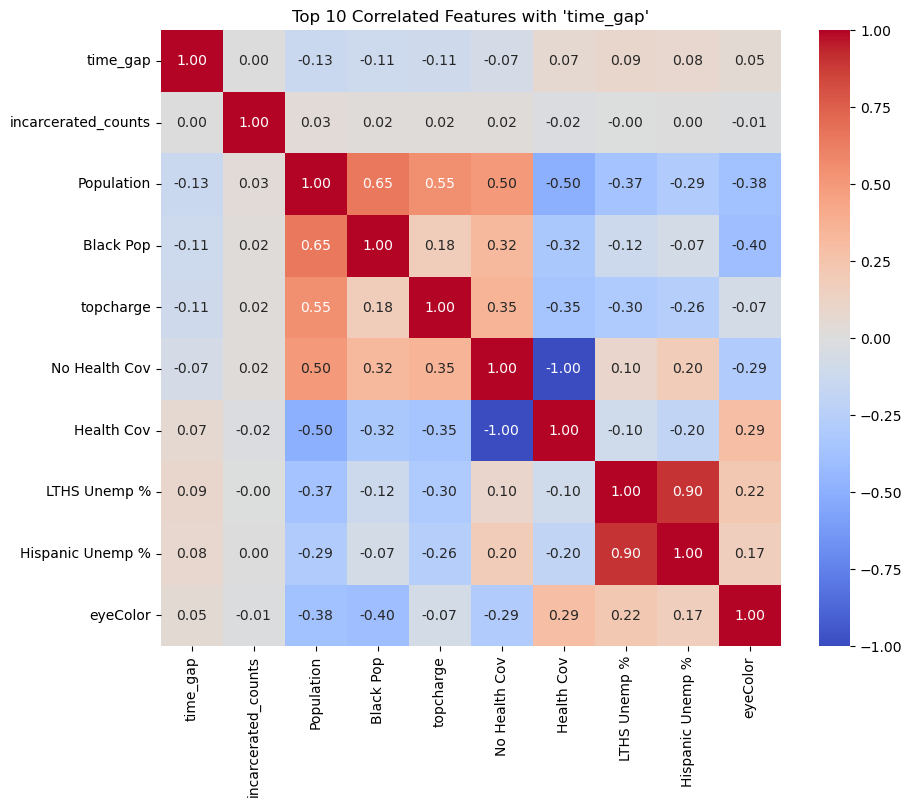

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


features = ['age', 'dob', 'sex', 'race','eyeColor', 'hairColor', 'height', 'weight', 'bond', 'bail',
            'topcharge', 'firstappearance', 'county', 'date', 'incarcerated_days',
            'Population', 'Asian Pop', 'Black Pop', 'Hispanic Pop', 'White Pop','Native Pop', 
            'Multi-Race Pop', 'Other Pop', 
            'Avg Hsld Size','Avg Fam Size', 'Owned Housing', 'Rented Housing', 
            'Health Cov','No Health Cov', 
            'Med Monthly Housing', 
            'Poverty %', 'Male Poverty %','Female Poverty %', 'White Poverty %', 'Black Poverty %',
            'Native Poverty %', 'Asian Poverty %', 'Other Poverty %','Hispanic Poverty %', 
            'Multi-Race Poverty %', 
            'Black Unemp %','Native Unemp %', 'Asian Unemp %', 'Other Unemp %','Multi-Race Unemp %', 
            'Hispanic Unemp %', 'White Unemp %','Male Unemp %', 'Female Unemp %', 'LTHS Unemp %', 
            'HS Unemp %','SC/AD Unemp %', 'Bach./Higher Unemp %', 
            'Top Political', 
            'time_gap','reincarceration', 'incarcerated_counts']

selected_features = df[features].copy()

# Initialize a label encoder
label_encoder = LabelEncoder()
# Assuming 'county' is a column in your DataFrame 'df'
selected_features['county'] = label_encoder.fit_transform(selected_features['county'])
selected_features['Top Political'] = label_encoder.fit_transform(selected_features['Top Political'])

#Calculate correlation matrix
correlation_matrix = selected_features.corr()

# Extract the top 10 correlated features with 'incarcerated_days'
top_correlated_features = correlation_matrix['reincarceration'].abs().nlargest(11).index[1:]

# Select only the top correlated features
top_correlation_matrix = selected_features[top_correlated_features].corr()

# Set the size of the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap using Seaborn
sns.heatmap(top_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title (optional)
plt.title("Top 10 Correlated Features with 'time_gap'")

# Save the plot
#plt.savefig('top_correlation_map_features.png', transparent=True)

# Show the plot
plt.show()

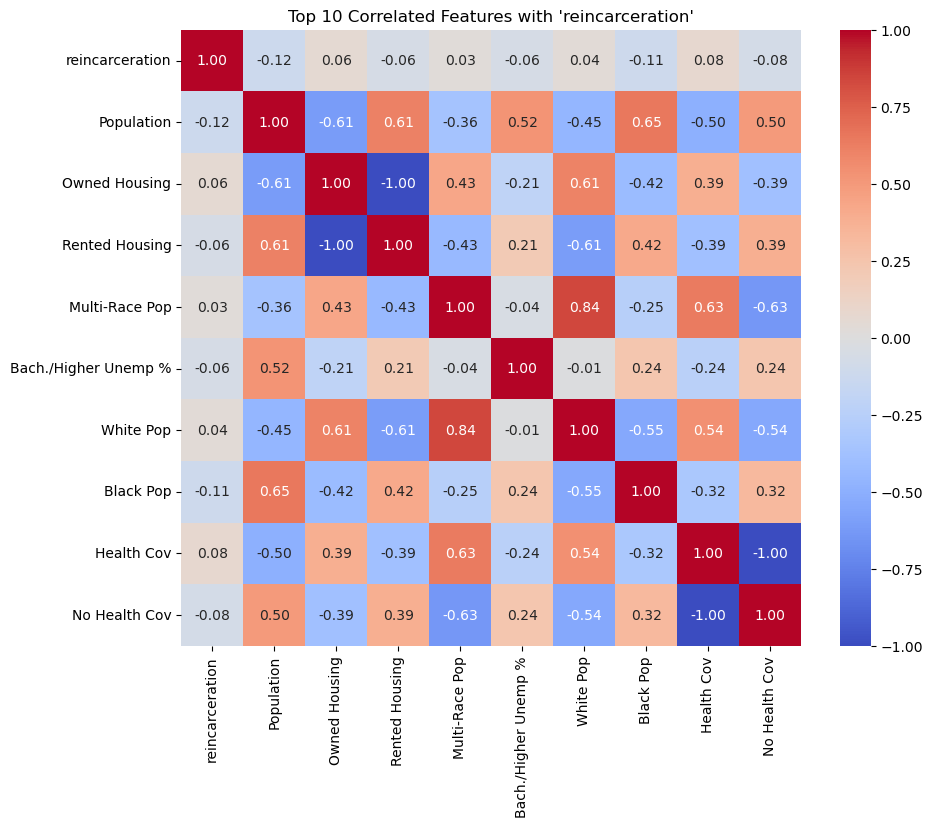

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


features = ['age', 'dob', 'sex', 'race','eyeColor', 'hairColor', 'height', 'weight', 'bond', 'bail',
            'topcharge', 'firstappearance', 'county', 'date', 'incarcerated_days',
            'Population', 'Asian Pop', 'Black Pop', 'Hispanic Pop', 'White Pop','Native Pop', 
            'Multi-Race Pop', 'Other Pop', 
            'Avg Hsld Size','Avg Fam Size', 'Owned Housing', 'Rented Housing', 
            'Health Cov','No Health Cov', 
            'Med Monthly Housing', 
            'Poverty %', 'Male Poverty %','Female Poverty %', 'White Poverty %', 'Black Poverty %',
            'Native Poverty %', 'Asian Poverty %', 'Other Poverty %','Hispanic Poverty %', 
            'Multi-Race Poverty %', 
            'Black Unemp %','Native Unemp %', 'Asian Unemp %', 'Other Unemp %','Multi-Race Unemp %', 
            'Hispanic Unemp %', 'White Unemp %','Male Unemp %', 'Female Unemp %', 'LTHS Unemp %', 
            'HS Unemp %','SC/AD Unemp %', 'Bach./Higher Unemp %', 
            'Top Political', 
            'time_gap','reincarceration', 'incarcerated_counts']

selected_features = df[features].copy()

# Initialize a label encoder
label_encoder = LabelEncoder()
# Assuming 'county' is a column in your DataFrame 'df'
selected_features['county'] = label_encoder.fit_transform(selected_features['county'])
selected_features['Top Political'] = label_encoder.fit_transform(selected_features['Top Political'])

#Calculate correlation matrix
correlation_matrix = selected_features.corr()

# Extract the top 10 correlated features with 'incarcerated_days'
top_correlated_features = correlation_matrix['incarcerated_counts'].abs().nlargest(11).index[1:]

# Select only the top correlated features
top_correlation_matrix = selected_features[top_correlated_features].corr()

# Set the size of the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap using Seaborn
sns.heatmap(top_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title (optional)
plt.title("Top 10 Correlated Features with 'reincarceration'")

# Save the plot
#plt.savefig('top_correlation_map_features.png', transparent=True)

# Show the plot
plt.show()

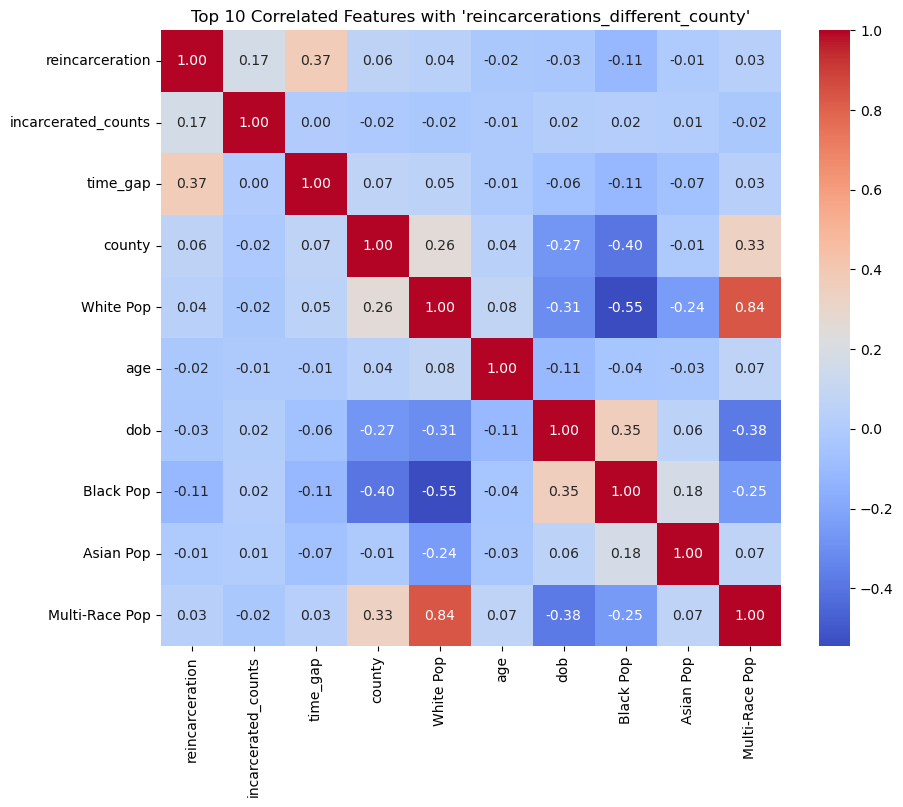

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


features = ['age', 'dob', 'sex', 'race','eyeColor', 'hairColor', 'height', 'weight', 'bond', 'bail',
            'topcharge', 'firstappearance', 'county', 'date', 'incarcerated_days',
            'Population', 'Asian Pop', 'Black Pop', 'Hispanic Pop', 'White Pop','Native Pop', 
            'Multi-Race Pop', 'Other Pop', 
            'Avg Hsld Size','Avg Fam Size', 'Owned Housing', 'Rented Housing', 
            'Health Cov','No Health Cov', 
            'Med Monthly Housing', 
            'Poverty %', 'Male Poverty %','Female Poverty %', 'White Poverty %', 'Black Poverty %',
            'Native Poverty %', 'Asian Poverty %', 'Other Poverty %','Hispanic Poverty %', 
            'Multi-Race Poverty %', 
            'Black Unemp %','Native Unemp %', 'Asian Unemp %', 'Other Unemp %','Multi-Race Unemp %', 
            'Hispanic Unemp %', 'White Unemp %','Male Unemp %', 'Female Unemp %', 'LTHS Unemp %', 
            'HS Unemp %','SC/AD Unemp %', 'Bach./Higher Unemp %', 
            'Top Political', 
            'time_gap','reincarceration', 'incarcerated_counts', 'reincarcerations_different_county']

selected_features = df[features].copy()

# Initialize a label encoder
label_encoder = LabelEncoder()
# Assuming 'county' is a column in your DataFrame 'df'
selected_features['county'] = label_encoder.fit_transform(selected_features['county'])
selected_features['Top Political'] = label_encoder.fit_transform(selected_features['Top Political'])

#Calculate correlation matrix
correlation_matrix = selected_features.corr()

# Extract the top 10 correlated features with 'incarcerated_days'
top_correlated_features = correlation_matrix['reincarcerations_different_county'].abs().nlargest(11).index[1:]

# Select only the top correlated features
top_correlation_matrix = selected_features[top_correlated_features].corr()

# Set the size of the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap using Seaborn
sns.heatmap(top_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title (optional)
plt.title("Top 10 Correlated Features with 'reincarcerations_different_county'")

# Save the plot
#plt.savefig('top_correlation_map_features.png', transparent=True)

# Show the plot
plt.show()

# Statistical Method for Significant Predictors

In [8]:
from sklearn.preprocessing import LabelEncoder

features = ['age', 'sex', 'race','eyeColor', 'hairColor', 'height', 'weight', 'bond', 'bail',
            'topcharge', 'firstappearance', 'county', 'date', 'incarcerated_days',
            'Population', 'Asian Pop', 'Black Pop', 'Hispanic Pop', 'White Pop','Native Pop', 
            'Multi-Race Pop', 'Other Pop', 
            'Avg Hsld Size','Avg Fam Size', 'Owned Housing', 'Rented Housing', 
            'Health Cov','No Health Cov', 
            'Med Monthly Housing', 
            'Poverty %', 'Male Poverty %','Female Poverty %', 'White Poverty %', 'Black Poverty %',
            'Native Poverty %', 'Asian Poverty %', 'Other Poverty %','Hispanic Poverty %', 
            'Multi-Race Poverty %', 
            'Black Unemp %','Native Unemp %', 'Asian Unemp %', 'Other Unemp %','Multi-Race Unemp %', 
            'Hispanic Unemp %', 'White Unemp %','Male Unemp %', 'Female Unemp %', 'LTHS Unemp %', 
            'HS Unemp %','SC/AD Unemp %', 'Bach./Higher Unemp %', 
            'Top Political'] 
            
            #'time_gap','reincarceration', 'incarcerated_counts']

selected_features = df[features].copy()

#replace nan value in bond and bail with 0
selected_features.loc[:,'bond'].fillna(0, inplace = True)
selected_features.loc[:,'age'].fillna(selected_features['age'].mean(), inplace = True)
selected_features.loc[:,'bail'].fillna(0, inplace = True)

# Convert 'firstappearance' to the year as an integer
selected_features.loc[:,'firstappearance'] = selected_features['firstappearance'].dt.year
selected_features.loc[:,'firstappearance'] = selected_features['firstappearance'].astype(int)
selected_features.loc[:,'date'] = selected_features['date'].dt.year
selected_features.loc[:,'date'] = selected_features['date'].astype(int)

# Convert 'sex' and 'topcharge' to categorical columns
selected_features['sex'] = selected_features['sex'].astype('int')
selected_features['eyeColor'] = selected_features['eyeColor'].astype('int')
selected_features['hairColor'] = selected_features['hairColor'].astype('int')
selected_features['race'] = selected_features['race'].astype('int')
selected_features['topcharge'] = selected_features['topcharge'].astype('int')

# Create a LabelEncoder instance
label_encoder = LabelEncoder()
# Assuming 'county' is a column in your DataFrame 'df'
selected_features['county'] = label_encoder.fit_transform(selected_features['county'])
selected_features['Top Political'] = label_encoder.fit_transform(selected_features['Top Political'])

# Perform logistic regression
import statsmodels.api as sm

linear_model = sm.OLS(df['reincarceration'], selected_features)
result = linear_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        reincarceration   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     508.4
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:59:53   Log-Likelihood:            -4.2212e+05
No. Observations:              601261   AIC:                         8.443e+05
Df Residuals:                  601213   BIC:                         8.449e+05
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
age                     -0.0010 

### Interpretation: 

- An R-squared of 0.038 means that approximately 3.8% of the variability in the number of incarcerated days can be explained by the independent variable included in the regression models. 
- The log-likelihood suggests that the model provides a good fit to the data.
- AIC and BIC provide a balance between model fit and complexity. In this case, both AIC and BIC are the same, and the absolute values are not as important as their relative values when comparing different models. Lower AIC and BIC values indicate a better-fitting model with fewer unnecessary parameter

### Significant Predictors:

The predictors with p-values less than 0.05 are typically considered statistically significant. Therefore, all the predictors listed above, except Weight, Multi-Race Pop, LTHS Unemp %, Multi-Race Unemp and firstapperance  can be considered significant predictors in this analysis.

#### Example way of interpreting p-value in this case: 

Age:

- Coefficient: -0.001
- P-value: ~ 0 (which is less than the commonly used significance level of 0.05)
- The positive coefficient for age suggests that as the county increases by one unit, the dependent variable (incarcerated_days) is expected to decrease by 0.001 units. The low p-value indicates that this relationship is statistically significant.


In [7]:
from sklearn.preprocessing import LabelEncoder
# Perform logistic regression
import statsmodels.api as sm

features = ['age', 'sex', 'race','eyeColor', 'hairColor', 'height', 'weight', 'bond', 'bail',
            'topcharge', 'firstappearance', 'county', 'date', 'incarcerated_days',
            'Population', 'Asian Pop', 'Black Pop', 'Hispanic Pop', 'White Pop','Native Pop', 
            'Multi-Race Pop', 'Other Pop', 
            'Avg Hsld Size','Avg Fam Size', 'Owned Housing', 'Rented Housing', 
            'Health Cov','No Health Cov', 
            'Med Monthly Housing', 
            'Poverty %', 'Male Poverty %','Female Poverty %', 'White Poverty %', 'Black Poverty %',
            'Native Poverty %', 'Asian Poverty %', 'Other Poverty %','Hispanic Poverty %', 
            'Multi-Race Poverty %', 
            'Black Unemp %','Native Unemp %', 'Asian Unemp %', 'Other Unemp %','Multi-Race Unemp %', 
            'Hispanic Unemp %', 'White Unemp %','Male Unemp %', 'Female Unemp %', 'LTHS Unemp %', 
            'HS Unemp %','SC/AD Unemp %', 'Bach./Higher Unemp %', 
            'Top Political'] 
            
            #'time_gap','reincarceration', 'incarcerated_counts']

selected_features = df[features].copy()

#replace nan value in bond and bail with 0
selected_features.loc[:,'bond'].fillna(0, inplace = True)
selected_features.loc[:,'age'].fillna(selected_features['age'].mean(), inplace = True)
selected_features.loc[:,'bail'].fillna(0, inplace = True)

# Convert 'firstappearance' to the year as an integer
selected_features.loc[:,'firstappearance'] = selected_features['firstappearance'].dt.year
selected_features.loc[:,'firstappearance'] = selected_features['firstappearance'].astype(int)
selected_features.loc[:,'date'] = selected_features['date'].dt.year
selected_features.loc[:,'date'] = selected_features['date'].astype(int)

# Convert 'sex' and 'topcharge' to categorical columns
selected_features['sex'] = selected_features['sex'].astype('int')
selected_features['eyeColor'] = selected_features['eyeColor'].astype('int')
selected_features['hairColor'] = selected_features['hairColor'].astype('int')
selected_features['race'] = selected_features['race'].astype('int')
selected_features['topcharge'] = selected_features['topcharge'].astype('int')

# Create a LabelEncoder instance
label_encoder = LabelEncoder()
# Assuming 'county' is a column in your DataFrame 'df'
selected_features['county'] = label_encoder.fit_transform(selected_features['county'])
selected_features['Top Political'] = label_encoder.fit_transform(selected_features['Top Political'])

# Perform logistic regression with cluster-robust standard errors
linear_model = sm.OLS(df['reincarceration'], selected_features)
result = linear_model.fit(cov_type='cluster', cov_kwds={'groups': selected_features['county']})
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        reincarceration   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 19 Nov 2023   Prob (F-statistic):                nan
Time:                        20:57:22   Log-Likelihood:            -4.2212e+05
No. Observations:              601261   AIC:                         8.443e+05
Df Residuals:                  601213   BIC:                         8.449e+05
Df Model:                          47                                         
Covariance Type:              cluster                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
age                     -0.0010 

In [16]:
from sklearn.preprocessing import LabelEncoder

features = ['age', 'sex', 'race','eyeColor', 'hairColor', 'height', 'weight', 'bond', 'bail',
            'topcharge', 'firstappearance', 'county', 'date', 'incarcerated_days',
            'Population', 'Asian Pop', 'Black Pop', 'Hispanic Pop', 'White Pop','Native Pop', 
            'Multi-Race Pop', 'Other Pop', 
            'Avg Hsld Size','Avg Fam Size', 'Owned Housing', 'Rented Housing', 
            'Health Cov','No Health Cov', 
            'Med Monthly Housing', 
            'Poverty %', 'Male Poverty %','Female Poverty %', 'White Poverty %', 'Black Poverty %',
            'Native Poverty %', 'Asian Poverty %', 'Other Poverty %','Hispanic Poverty %', 
            'Multi-Race Poverty %', 
            'Black Unemp %','Native Unemp %', 'Asian Unemp %', 'Other Unemp %','Multi-Race Unemp %', 
            'Hispanic Unemp %', 'White Unemp %','Male Unemp %', 'Female Unemp %', 'LTHS Unemp %', 
            'HS Unemp %','SC/AD Unemp %', 'Bach./Higher Unemp %', 
            'Top Political'] 
            
            #'time_gap','reincarceration', 'incarcerated_counts']

selected_features = df[features].copy()

#replace nan value in bond and bail with 0
selected_features.loc[:,'bond'].fillna(0, inplace = True)
selected_features.loc[:,'age'].fillna(selected_features['age'].mean(), inplace = True)
selected_features.loc[:,'bail'].fillna(0, inplace = True)

# Convert 'firstappearance' to the year as an integer
selected_features.loc[:,'firstappearance'] = selected_features['firstappearance'].dt.year
selected_features.loc[:,'firstappearance'] = selected_features['firstappearance'].astype(int)
selected_features.loc[:,'date'] = selected_features['date'].dt.year
selected_features.loc[:,'date'] = selected_features['date'].astype(int)

# Convert 'sex' and 'topcharge' to categorical columns
selected_features['sex'] = selected_features['sex'].astype('int')
selected_features['eyeColor'] = selected_features['eyeColor'].astype('int')
selected_features['hairColor'] = selected_features['hairColor'].astype('int')
selected_features['race'] = selected_features['race'].astype('int')
selected_features['topcharge'] = selected_features['topcharge'].astype('int')

# Create a LabelEncoder instance
label_encoder = LabelEncoder()
# Assuming 'county' is a column in your DataFrame 'df'
selected_features['county'] = label_encoder.fit_transform(selected_features['county'])
selected_features['Top Political'] = label_encoder.fit_transform(selected_features['Top Political'])

# Perform logistic regression
import statsmodels.api as sm

linear_model = sm.OLS(df['reincarcerations_different_county'], selected_features)
result = linear_model.fit()
print(result.summary())

                                    OLS Regression Results                                   
Dep. Variable:     reincarcerations_different_county   R-squared:                       0.014
Model:                                           OLS   Adj. R-squared:                  0.014
Method:                                Least Squares   F-statistic:                     177.7
Date:                               Thu, 09 Nov 2023   Prob (F-statistic):               0.00
Time:                                       10:20:43   Log-Likelihood:            -2.2749e+05
No. Observations:                             601261   AIC:                         4.551e+05
Df Residuals:                                 601213   BIC:                         4.556e+05
Df Model:                                         47                                         
Covariance Type:                           nonrobust                                         
                           coef    std err          t      P

### Interpretation: 

- An R-squared of 0.014 means that approximately 1.4% of the variability in the number of incarcerated days can be explained by the independent variable included in the regression models. 

In [17]:
from sklearn.linear_model import Lasso

X = selected_features
y = df['reincarceration']

lasso_model = Lasso(alpha=0.1)  # You can adjust the regularization strength (alpha)
result = lasso_model.fit(X, y)

# Retrieve the coefficients and their significance
feature_coef = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_model.coef_})
feature_coef['Significant'] = feature_coef['Coefficient'] != 0

In [18]:
print(feature_coef)

                 Feature   Coefficient  Significant
0                    age -4.225414e-04         True
1                    sex -0.000000e+00        False
2                   race -0.000000e+00        False
3               eyeColor  0.000000e+00        False
4              hairColor  0.000000e+00        False
5                 height  0.000000e+00        False
6                 weight  1.686456e-04         True
7                   bond -3.290235e-09         True
8                   bail -1.083329e-08         True
9              topcharge -0.000000e+00        False
10       firstappearance -0.000000e+00        False
11                county  0.000000e+00        False
12                  date -0.000000e+00        False
13     incarcerated_days -8.869597e-05         True
14            Population -1.737037e-08         True
15             Asian Pop  1.671699e-03         True
16             Black Pop -0.000000e+00        False
17          Hispanic Pop  0.000000e+00        False
18          

#### Interpretation

In Lasso regression, the coefficients are penalized to be exactly zero, which leads to feature selection. When the coefficient of a predictor is zero, it means that the predictor is not contributing to the model, and the corresponding feature can be considered as not significant.

### Results 

The significant predictors that are common to both models are:
- 'age', 'bond', 'bail', 'Population', 'Asian Pop', 'Med Monthly Housing'

These are the predictors that both models agree are significant in explaining the variance in the response variable.

In [19]:
from sklearn.linear_model import Lasso

X = selected_features
y = df['reincarcerations_different_county']

lasso_model = Lasso(alpha=0.1)  # You can adjust the regularization strength (alpha)
result = lasso_model.fit(X, y)

# Retrieve the coefficients and their significance
feature_coef = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_model.coef_})
feature_coef['Significant'] = feature_coef['Coefficient'] != 0

In [20]:
print(feature_coef)

                 Feature   Coefficient  Significant
0                    age -1.692729e-04         True
1                    sex -0.000000e+00        False
2                   race -0.000000e+00        False
3               eyeColor -0.000000e+00        False
4              hairColor -0.000000e+00        False
5                 height  0.000000e+00        False
6                 weight  1.311435e-04         True
7                   bond -1.331486e-10         True
8                   bail -8.026614e-09         True
9              topcharge -0.000000e+00        False
10       firstappearance  0.000000e+00        False
11                county -1.451127e-04         True
12                  date  0.000000e+00        False
13     incarcerated_days -0.000000e+00        False
14            Population  1.379714e-09         True
15             Asian Pop  0.000000e+00        False
16             Black Pop  0.000000e+00        False
17          Hispanic Pop  0.000000e+00        False
18          

### Results 

The significant predictors that are common to both models are:
- 'age', 'bond', 'bail', 'county', 'Population', 'White Pop', 'Med Monthly Housing',
       
These are the predictors that both models agree are significant in explaining the variance in the response variable.

### Note

Distinguishing between Significant Predictors and Feature Importance
- Context:

    - Significant predictors are often discussed in the context of statistical models and hypothesis testing.
    - Feature importance is a concept more commonly associated with machine learning models.
- Methodology:

    - Significance in statistical models is often determined through hypothesis testing and p-values.
    - Feature importance in machine learning models is computed using various algorithms specific to the model type.
- Interpretation:

    - Significance indicates a meaningful relationship between a predictor and the response variable.
    - Feature importance reflects the contribution of a feature to the overall predictive performance of the model.
    
In practice, if you're working with statistical models, you might talk about significant predictors. In machine learning, especially with ensemble models, you're more likely to discuss feature importance. Both concepts aim to identify variables that are crucial for understanding or predicting the outcome, but they come from different traditions of statistical analysis.

# Building a multi-level models 

In [7]:
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import statsmodels.formula.api as smf


features = ['age', 'sex', 'race','eyeColor', 'hairColor', 'height', 'weight', 'bond', 'bail',
            'topcharge', 'firstappearance', 'county', 'date', 'incarcerated_days',
            'Population', 'Asian Pop', 'Black Pop', 'Hispanic Pop', 'White Pop','Native Pop', 
            'Multi-Race Pop', 'Other Pop', 
            'Avg Hsld Size','Avg Fam Size', 'Owned Housing', 'Rented Housing', 
            'Health Cov','No Health Cov', 
            'Med Monthly Housing', 
            'Poverty %', 'Male Poverty %','Female Poverty %', 'White Poverty %', 'Black Poverty %',
            'Native Poverty %', 'Asian Poverty %', 'Other Poverty %','Hispanic Poverty %', 
            'Multi-Race Poverty %', 
            'Black Unemp %','Native Unemp %', 'Asian Unemp %', 'Other Unemp %','Multi-Race Unemp %', 
            'Hispanic Unemp %', 'White Unemp %','Male Unemp %', 'Female Unemp %', 'LTHS Unemp %', 
            'HS Unemp %','SC/AD Unemp %', 'Bach./Higher Unemp %', 
            'Top Political', 'reincarceration'] 
            
            #'time_gap','reincarceration', 'incarcerated_counts']

selected_features = df[features].copy()
# Replace spaces and special characters with underscores in column names
selected_features.columns = selected_features.columns.str.replace(' ', '_').str.replace('%', 'pct').str.replace('.', '').str.replace('-', '_').str.replace('/','_')

#replace nan value in bond and bail with 0
selected_features.loc[:,'bond'].fillna(0, inplace = True)
selected_features.loc[:,'age'].fillna(selected_features['age'].mean(), inplace = True)
selected_features.loc[:,'bail'].fillna(0, inplace = True)

# Convert 'firstappearance' to the year as an integer
selected_features.loc[:,'firstappearance'] = selected_features['firstappearance'].dt.year
selected_features.loc[:,'firstappearance'] = selected_features['firstappearance'].astype(int)
selected_features.loc[:,'date'] = selected_features['date'].dt.year
selected_features.loc[:,'date'] = selected_features['date'].astype(int)

# Convert 'sex' and 'topcharge' to categorical columns
selected_features['sex'] = selected_features['sex'].astype('int')
selected_features['eyeColor'] = selected_features['eyeColor'].astype('int')
selected_features['hairColor'] = selected_features['hairColor'].astype('int')
selected_features['race'] = selected_features['race'].astype('int')
selected_features['topcharge'] = selected_features['topcharge'].astype('int')

# Create a LabelEncoder instance
label_encoder = LabelEncoder()
# Assuming 'county' is a column in your DataFrame 'df'
selected_features['county'] = label_encoder.fit_transform(selected_features['county'])
selected_features['Top_Political'] = label_encoder.fit_transform(selected_features['Top_Political'])

import statsmodels.api as sm
import statsmodels.formula.api as smf

# Create a formula for the model excluding the 'reincarceration' column
formula = 'reincarceration ~ ' + ' + '.join(selected_features.columns.difference(['reincarceration'])) + ' + (1 | county)'

# Fit the mixed-effects model
mixed_model = smf.mixedlm(formula, data=selected_features, groups=selected_features['county'])
result = mixed_model.fit()

# Print the summary
print(result.summary())

/Users/besocxinh/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/besocxinh/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/besocxinh/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/Users/besocxinh/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


                      Mixed Linear Model Regression Results
Model:                    MixedLM       Dependent Variable:       reincarceration
No. Observations:         601261        Method:                   REML           
No. Groups:               35            Scale:                    0.2384         
Min. group size:          500           Log-Likelihood:           -422395.0613   
Max. group size:          116388        Converged:                Yes            
Mean group size:          17178.9                                                
---------------------------------------------------------------------------------
                         Coef.     Std.Err.     z    P>|z|    [0.025     0.975]  
---------------------------------------------------------------------------------
Intercept              191798.942                                                
Asian_Pop                -381.635  11337.447  -0.034 0.973  -22602.622  21839.352
Asian_Poverty_pct         732.114   53

/Users/besocxinh/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2706: RuntimeWarning: invalid value encountered in sqrt
  sdf[0:self.k_fe, 1] = np.sqrt(np.diag(self.cov_params()[0:self.k_fe]))


In [8]:
# Adjust the significance level as needed
significance_level = 0.05

# Extract coefficients and p-values from the model summary
coefficients = result.params
p_values = result.pvalues

# Create a DataFrame with coefficients and p-values
coefficients_df = pd.DataFrame({'Coefficient': coefficients, 'P-Value': p_values})

# Filter significant predictors based on the significance level
significant_predictors = coefficients_df[coefficients_df['P-Value'] < significance_level]

# Display the significant predictors
print("Significant Predictors:")
print(significant_predictors)

Significant Predictors:
                    Coefficient        P-Value
age               -1.045992e-03   2.245878e-72
bail              -8.597777e-09   1.291324e-03
bond              -2.634092e-09   3.425624e-13
date               7.651860e-03   1.289047e-02
eyeColor          -2.794734e-03   3.282804e-05
hairColor         -5.969262e-03   1.588865e-19
height             5.812881e-03  5.744870e-117
incarcerated_days -1.326611e-04   9.016379e-42
race              -8.056049e-03   1.405470e-49
sex                9.061194e-03   3.986501e-51
topcharge         -1.813128e-02   0.000000e+00


In [16]:
import statsmodels.api as sm
import pandas as pd
from scipy.stats import chi2

# Assuming 'result' is the variable containing the mixed-effects model result

# Create a formula for the model excluding the 'reincarceration' column
original_formula = 'reincarceration ~ ' + ' + '.join(selected_features.columns.difference(['reincarceration'])) + ' + (1 | county)'
original_model = smf.mixedlm(original_formula, data=selected_features, groups=selected_features['county'])
original_result = original_model.fit()

# Fit a null model (intercept-only model)
null_formula = 'reincarceration ~ 1'  # 1 indicates an intercept-only model
null_model = smf.mixedlm(null_formula, data=selected_features, groups=selected_features['county'])
null_result = null_model.fit()


# Get log-likelihood values for the current and null models
log_likelihood_current = original_result.llf
log_likelihood_null = null_result.llf

# Compute the number of parameters for each model
num_params_current = original_result.df_modelwc
num_params_null = null_result.df_modelwc

# Perform a likelihood ratio test
likelihood_ratio_test = -2 * (log_likelihood_null - log_likelihood_current)
degrees_of_freedom = num_params_current - num_params_null

# Avoid negative degrees of freedom
degrees_of_freedom = max(0, degrees_of_freedom)

# Calculate the p-value
p_value = 1.0 - chi2.cdf(likelihood_ratio_test, degrees_of_freedom)

# Display results
print(f"Likelihood Ratio Test: {likelihood_ratio_test}")
print(f"Degrees of Freedom: {degrees_of_freedom}")
print(f"P-Value: {p_value}")


/Users/besocxinh/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/besocxinh/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/besocxinh/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/Users/besocxinh/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/Users/besocxinh/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to co

Likelihood Ratio Test: 4732.824321529828
Degrees of Freedom: 54
P-Value: 0.0


#### Interpretation:

- Likelihood Ratio Test Statistic (4732.82):
    - This value represents the measure of the difference in fit between the full model (your model with predictors and random effects) and the null model (intercept-only model). Larger values indicate a greater difference in fit.
- Degrees of Freedom (54):
    - Degrees of freedom represent the number of additional parameters in the full model compared to the null model. In this case, the difference in the number of parameters is 54.
- P-Value (0.0):
    - The p-value associated with the likelihood ratio test is extremely small (close to zero). This suggests strong evidence against the null hypothesis, indicating that the full model with predictors and random effects fits the data significantly better than the null model.

#### Conclusion:
The small p-value indicates that the inclusion of predictors and random effects in your model has significantly improved its fit compared to an intercept-only model. Therefore, you have evidence to reject the null hypothesis that the simpler model (null model) is sufficient. The full model, which includes the specified predictors and random effects, provides a better explanation of the variability in the response variable.
In summary, your model appears to be statistically significant and provides a better fit to the data than a model with no predictors.



# Machine Learning Models for Feature Importances

In [5]:
not_selected = ['nameFull', 'bookingNumber', 'bookingDate', 'caseNumber',
                'inmateNumber', 'housing1', 'housing1a', 'housing2', 'housing3',
                'nameLast', 'nameFirst', 'nameMiddle', 'dob' , 
                'time_gap', 'incarcerated_counts', 'reincarcerations_different_county']

# Convert date-related columns to datetime
date_columns = ['firstappearance', 'date']
for col in date_columns:
    df.loc[:,col] = pd.to_datetime(df[col], errors='coerce')

#replace nan value in bond and bail with 0
df.loc[:,'bond'].fillna(0, inplace = True)
df.loc[:,'age'].fillna(df['age'].mean(), inplace = True)
df.loc[:,'bail'].fillna(0, inplace = True)

# Convert 'firstappearance' to the year as an integer
df.loc[:,'firstappearance'] = df['firstappearance'].dt.year
df.loc[:,'firstappearance'] = df['firstappearance'].astype(int)
df.loc[:,'date'] = df['date'].dt.year
df.loc[:,'date'] = df['date'].astype(int)


# Convert 'sex' and 'topcharge' to categorical columns
df['sex'] = df['sex'].astype('category')
df['eyeColor'] = df['eyeColor'].astype('category')
df['hairColor'] = df['hairColor'].astype('category')
df['race'] = df['race'].astype('category')
df['county'] = df['county'].astype('category')
#df = pd.get_dummies(df, columns=['county'], drop_first=True)
df['topcharge'] = df['topcharge'].astype('category')
df['Top Political'] = df['Top Political'].astype('category')
#df = pd.get_dummies(df, columns=['Top Political'], drop_first=True)

In [6]:
#Choose all predictors except target & IDcols
#predictors = df[features]
rcParams['figure.figsize'] = 12, 4

def modelfit(alg, dtrain, predictors, dtest ,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        #xgtrain = xgb.DMatrix(dtrain[predictors].values, 
                              #label=dtrain['reincarceration'].values, 
                              #enable_categorical = True)
        cvresult = xgb.cv(xgb_param, dtrain, 
                          num_boost_round=alg.get_params()['n_estimators'], 
                          nfold=cv_folds,
                          metrics='auc', 
                          early_stopping_rounds=early_stopping_rounds,
                         verbose_eval = 50)

        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain.get_data(), dtrain.get_label() ,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain.get_data())
    dtrain_predprob = alg.predict_proba(dtrain.get_data())[:,1]
    
    # Predict test set
    dtest_predictions = alg.predict(dtest.get_data())
    dtest_predprob = alg.predict_proba(dtest.get_data())[:, 1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtest.get_label(), dtest_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain.get_label(), dtrain_predprob))
    print ("AUC Score (Test): %f" % metrics.roc_auc_score(dtest.get_label(), dtest_predprob))
                    
    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feature_mapping = {f"f{idx}": name for idx, name in enumerate(X)}

    # Print feature importance scores
    print("Feature Importance Scores:")
    for feature, score in feat_imp.items():
        original_feature_name = feature_mapping.get(feature, "Unknown")
        print(f"{original_feature_name if original_feature_name != 'Unknown' else feature}: {score}")

    # Sort feature importances in descending order
    feat_imp = feat_imp.sort_values(ascending=False)

    # Get the feature names based on their index using the feature_mapping dictionary
    feature_names = [feature_mapping.get(feature, f"f{feature}") for feature in feat_imp.index]

    # Plot the feature importances with feature names
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.xticks(range(len(feature_names)), feature_names, rotation=90)  # Set x-axis labels
    plt.ylabel('Feature Importance Score')
    plt.savefig('reincarceration_graph_3.png', transparent=True)

[0]	train-auc:0.65741+0.00021	test-auc:0.65661+0.00126
[50]	train-auc:1.00000+0.00000	test-auc:1.00000+0.00000


/Users/besocxinh/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(



Model Report
Accuracy : 0.8964
AUC Score (Train): 1.000000
AUC Score (Test): 1.000000
Feature Importance Scores:
incarcerated_days: 10.0
Health Cov: 8.0
topcharge: 7.0
race: 4.0
bond: 4.0
Black Pop: 2.0
height: 1.0
firstappearance: 1.0
county: 1.0
date: 1.0
Population: 1.0
White Pop: 1.0
Native Unemp %: 1.0
Multi-Race Unemp %: 1.0
reincarceration: 1.0


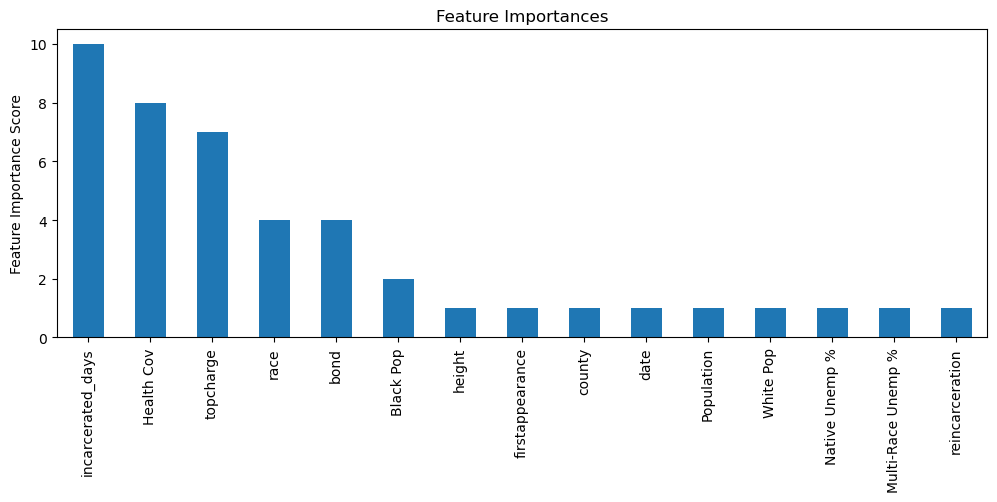

In [7]:
predictors = [x for x in df.columns if x not in not_selected] 
X = df[predictors]
y = df['reincarceration']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a DMatrix with enable_categorical=True
dtrain = xgb.DMatrix(X_train, label = y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label = y_test, enable_categorical=True)

xgb1 = XGBClassifier(learning_rate =0.1,
 n_estimators=895,
 max_depth=5,
 min_child_weight=5,
 gamma=0.3,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27,
 enable_categorical = True)

modelfit(xgb1, dtrain, predictors, dtest = dtest)

### Common strong predictors:

- age
- incarcerated_days
- bond/bail
- race
- topcharge
- weight
- height
- county
- Population (Asian Pop, White Pop, Black Pop etc.)
- Poverty %
- Unemployment %

### Differences in strong predictors:

- Linear and Lasso Regression: Includes features like 'age', 'bond', 'bail', 'county', 'Population', 'White Pop', 'Med Monthly Housing',

- XGBoost: Puts more emphasis on features like age, incarcerated_days, bond, weight, height, topcharge, race, bail, sex, county, population and unemployment %

It seems that while some features are common strong predictors, there are differences in the emphasis placed on certain features by the linear and Lasso regression compared to XGBoost models. The choice of strong predictors can be influenced by the modeling technique and the inherent characteristics of the data. Linear and Lasso regression focuses on coefficients and their statistical significance, while XGBoost considers the importance of features based on their contribution to the model's predictive performance (the ability of variables in making better prediction)

Note that: The importance score of a feature in XGBoost reflects its contribution to the model's predictive performance. A low score doesn't necessarily mean it's a weak predictor; it might indicate that the feature doesn't play a crucial role in the specific context of the model or that its contribution is overshadowed by other more influential features.

[0]	train-auc:0.62627+0.00114	test-auc:0.62548+0.00199
[50]	train-auc:0.84359+0.00030	test-auc:0.84100+0.00093
[100]	train-auc:0.84757+0.00037	test-auc:0.84318+0.00108
[150]	train-auc:0.85151+0.00027	test-auc:0.84482+0.00123
[200]	train-auc:0.85493+0.00020	test-auc:0.84605+0.00131
[250]	train-auc:0.85781+0.00019	test-auc:0.84686+0.00132
[300]	train-auc:0.86033+0.00027	test-auc:0.84741+0.00134
[350]	train-auc:0.86255+0.00027	test-auc:0.84790+0.00146
[400]	train-auc:0.86469+0.00033	test-auc:0.84820+0.00148
[450]	train-auc:0.86658+0.00036	test-auc:0.84842+0.00148
[500]	train-auc:0.86832+0.00039	test-auc:0.84868+0.00151
[550]	train-auc:0.87001+0.00037	test-auc:0.84890+0.00155
[600]	train-auc:0.87154+0.00033	test-auc:0.84908+0.00161
[650]	train-auc:0.87306+0.00032	test-auc:0.84934+0.00164
[700]	train-auc:0.87444+0.00034	test-auc:0.84950+0.00168
[750]	train-auc:0.87576+0.00032	test-auc:0.84970+0.00173
[800]	train-auc:0.87700+0.00035	test-auc:0.84976+0.00176
[850]	train-auc:0.87820+0.00037	te

/Users/besocxinh/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(



Model Report
Accuracy : 0.8571
AUC Score (Train): 0.872036
AUC Score (Test): 0.852071
Feature Importance Scores:
age: 3531.0
incarcerated_days: 2695.0
weight: 2433.0
height: 2023.0
bond: 1861.0
race: 835.0
topcharge: 792.0
bail: 754.0
hairColor: 629.0
eyeColor: 517.0
firstappearance: 468.0
date: 416.0
sex: 318.0
county: 314.0
Population: 231.0
Black Pop: 212.0
Black Unemp %: 189.0
Native Poverty %: 189.0
Asian Pop: 184.0
Health Cov: 179.0
Asian Poverty %: 169.0
Owned Housing: 167.0
Other Pop: 166.0
Multi-Race Unemp %: 156.0
Black Poverty %: 156.0
Bach./Higher Unemp %: 153.0
Avg Hsld Size: 148.0
White Pop: 145.0
Native Unemp %: 137.0
Other Poverty %: 136.0
Asian Unemp %: 134.0
Other Unemp %: 133.0
Multi-Race Pop: 130.0
Hispanic Pop: 130.0
Native Pop: 125.0
SC/AD Unemp %: 106.0
Hispanic Unemp %: 98.0
White Poverty %: 94.0
reincarceration: 90.0
LTHS Unemp %: 89.0
Med Monthly Housing: 88.0
White Unemp %: 86.0
HS Unemp %: 81.0
Female Unemp %: 73.0
Multi-Race Poverty %: 72.0
Male Unemp %: 6

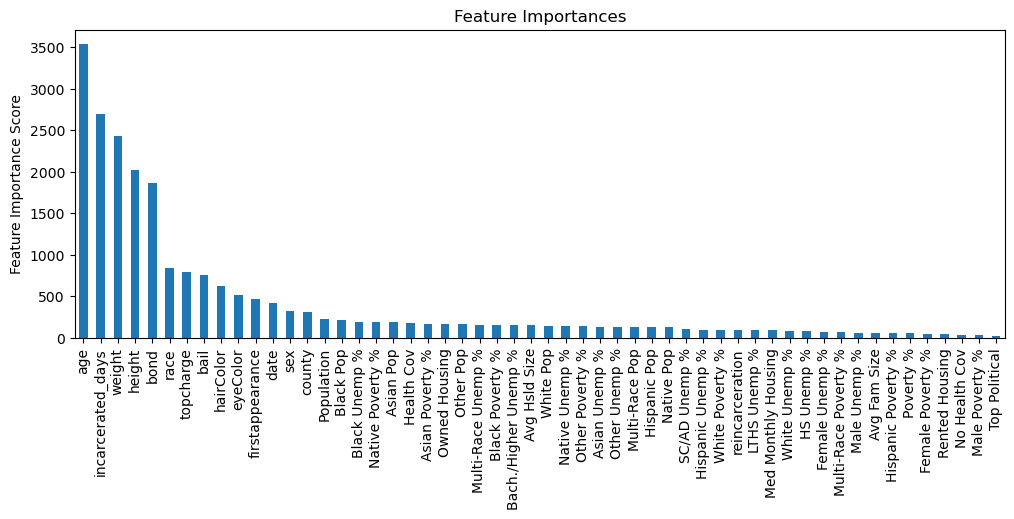

In [8]:
predictors = [x for x in df.columns if x not in not_selected] 
X = df[predictors]
y = df['reincarcerations_different_county']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a DMatrix with enable_categorical=True
dtrain = xgb.DMatrix(X_train, label = y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label = y_test, enable_categorical=True)

xgb1 = XGBClassifier(learning_rate =0.1,
 n_estimators=895,
 max_depth=5,
 min_child_weight=5,
 gamma=0.3,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27,
 enable_categorical = True)

modelfit(xgb1, dtrain, predictors, dtest = dtest)

#### Interpretation

- Model Performance Metrics:
    - Accuracy: 0.8516
        - This represents the overall correctness of the model's predictions on the test set. In this case, around 85.16% of the predictions are correct.
    - AUC Score (Train): 0.700899
        - The AUC (Area Under the Curve) score for the training set measures the model's ability to distinguish between positive and negative instances. A score of 0.7 is reasonably good, suggesting that the model performs better than random chance on the training data.
    - AUC Score (Test): 0.663339
        - The AUC score for the test set is slightly lower than the training AUC. This metric evaluates the model's generalization to new, unseen data. While 0.66 is not a very high AUC score, it still indicates some ability to discriminate between classes.

- Feature Importance Scores: These scores represent the importance of each feature in the model. Higher scores indicate more influential features in making predictions.
    - Top Features:
        - age: 3113.0
        - incarcerated_days: 2254.0
        - weight: 2072.0
        - height: 1711.0
        - bond: 1638.0
- Interpretation:
    - Features with higher importance scores contribute more to the model's decision-making process.
    - In this specific case, features related to age, days incarcerated, weight, height, and bond amount seem to have the highest impact on the model's predictions.
- Recommendations:
    - Consider further analyzing and understanding the context of these top features to gain insights into why they are influential.
    - If necessary, domain knowledge can be used to interpret the findings and potentially improve the model or refine the features.
- Next Steps:
    - Depending on the specific requirements and domain knowledge, you might want to experiment with model hyperparameters or feature engineering to improve the model's performance.
    - If the model's predictive performance is critical, you may also consider fine-tuning hyperparameters or exploring other algorithms.
    - Remember, while accuracy and AUC are essential metrics, the context of your specific problem and the consequences of false positives/negatives should guide your interpretation and decision-making.







# Choose better predictors to build ML models using XGBoost

[0]	train-auc:0.87300+0.00042	test-auc:0.87273+0.00082
[50]	train-auc:0.89125+0.00025	test-auc:0.89002+0.00089
[100]	train-auc:0.89406+0.00040	test-auc:0.89183+0.00086
[150]	train-auc:0.89655+0.00035	test-auc:0.89313+0.00100
[200]	train-auc:0.89888+0.00031	test-auc:0.89417+0.00103
[250]	train-auc:0.90088+0.00030	test-auc:0.89488+0.00105
[300]	train-auc:0.90266+0.00030	test-auc:0.89542+0.00110
[350]	train-auc:0.90420+0.00031	test-auc:0.89586+0.00117
[400]	train-auc:0.90566+0.00031	test-auc:0.89623+0.00117
[450]	train-auc:0.90699+0.00034	test-auc:0.89658+0.00118
[500]	train-auc:0.90822+0.00032	test-auc:0.89684+0.00118
[550]	train-auc:0.90944+0.00030	test-auc:0.89710+0.00118
[600]	train-auc:0.91054+0.00035	test-auc:0.89732+0.00125
[650]	train-auc:0.91163+0.00037	test-auc:0.89747+0.00122
[700]	train-auc:0.91265+0.00037	test-auc:0.89768+0.00119
[750]	train-auc:0.91361+0.00037	test-auc:0.89783+0.00116
[800]	train-auc:0.91453+0.00037	test-auc:0.89795+0.00122
[850]	train-auc:0.91545+0.00034	te

/Users/besocxinh/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(



Model Report
Accuracy : 0.8921
AUC Score (Train): 0.910417
AUC Score (Test): 0.898597
Feature Importance Scores:
age: 3012.0
incarcerated_counts: 2654.0
incarcerated_days: 2366.0
weight: 2053.0
bond: 1569.0
height: 1567.0
county: 1155.0
Population: 1121.0
race: 930.0
Poverty %: 900.0
Health Cov: 884.0
topcharge: 839.0
bail: 727.0
hairColor: 617.0
eyeColor: 521.0
sex: 412.0


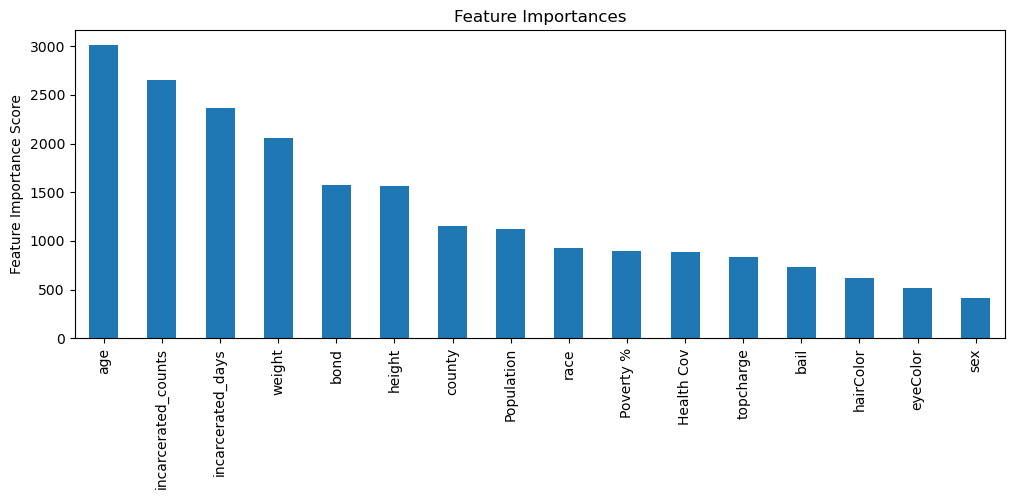

In [29]:
predictors = ['age', 'incarcerated_days', 'bond', 'weight', 'height', 'bail', 'race', 'topcharge',
             'hairColor', 'eyeColor', 'sex', 'county', 'Population', 'Poverty %', 'Health Cov', 
             'incarcerated_counts'] 
X = df[predictors]
y = df['reincarcerations_different_county']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a DMatrix with enable_categorical=True
dtrain = xgb.DMatrix(X_train, label = y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label = y_test, enable_categorical=True)

xgb1 = XGBClassifier(learning_rate =0.1,
 n_estimators=895,
 max_depth=5,
 min_child_weight=5,
 gamma=0.3,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27,
 enable_categorical = True)

modelfit(xgb1, dtrain, predictors, dtest = dtest)

#### Interpretation: 

Note that: this model uses predictors that are considered as important from the previous model. 

- Accuracy: 0.8921
    - This represents the overall correctness of the model's predictions on the test set. In this case, around 89.21% of the predictions are correct.
    
- AUC Score (Train): 0.910417
    - The AUC (Area Under the Curve) score for the training set is high (0.91), indicating that the model performs well in distinguishing between positive and negative instances on the training data.

- AUC Score (Test): 0.898597
    - The AUC score for the test set is also high (0.8986), indicating good generalization to new, unseen data.

- Feature Importance Scores:These scores represent the importance of each feature in the model. Higher scores indicate more influential features in making predictions.
    - Top Features:
        - age: 3012.0
        - incarcerated_counts: 2654.0
        - incarcerated_days: 2366.0
        - weight: 2053.0
        - bond: 1569.0

- Interpretation:
    - Features with higher importance scores contribute more to the model's decision-making process.
    - In this specific case, features related to age, the count and days of incarceration, weight, and bond amount seem to have the highest impact on the model's predictions.

- Recommendations:
    - Consider further analyzing and understanding the context of these top features to gain insights into why they are influential.
    - If necessary, domain knowledge can be used to interpret the findings and potentially improve the model or refine the features.

- Next Steps:
     - Given the high AUC scores and accuracy, the model seems to be performing well on both the training and test sets.
    - Consider monitoring the model's performance over time and checking if the results hold on new data.
    - If applicable, explore opportunities for model deployment in real-world scenarios.

# Time Series Analysis

In this time series analysis, we utilized the SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous factors) model to forecast reincarceration counts for different counties. The data was divided into a training set, comprising 80% of the historical records, and a test set for validation. The SARIMAX model was fitted to each county's historical data, considering both autoregressive and seasonal components. Warnings related to the model fitting process were selectively suppressed to enhance readability. The forecasting horizon extended beyond October 2023, with predictions saved and adjusted to zero for any negative values. The visualization showcases the historical reincarceration counts for each county alongside the SARIMAX-based forecasts, providing a comprehensive overview of expected trends. This analysis aids in proactive decision-making by offering insights into potential future patterns in reincarceration counts across different regions.

The provided input code prepares the data for time series forecasting. As the original DataFrame df contains columns including 'date', 'county', and 'reincarceration', the code first sets the 'date' column as the index. Subsequently, it resamples the data to a monthly frequency and sums the counts for each county within each month. The resulting DataFrame, named df_monthly, is then pivoted to transform counties into columns and months into rows. This pivot operation creates a new DataFrame, df_pivot, which is displayed to provide an overview of the reshaped data structure. The resulting df_pivot is utilized in the subsequent time series forecasting code to predict future reincarceration counts for each county.

In [5]:
import pandas as pd

# Assuming df is your original DataFrame containing the data
# Make sure 'date' is already in datetime format

# Set 'date' as the index
df.set_index('date', inplace=True)

# Resample data to monthly frequency and sum the counts for each county
df_monthly = df.groupby(['county', pd.Grouper(freq='M')])['reincarceration'].sum().reset_index()

# Pivot the DataFrame to have counties as columns and months as rows
df_pivot = df_monthly.pivot(index='date', columns='county', values='reincarceration').fillna(0)

# Display the resulting DataFrame
display(df_pivot)

county,Monterey,Santa Cruz,Tulare,Madera,Calaveras,San Francisco,Marin,Shasta,Merced,Santa Barbara,...,Solano,San Luis Obispo,Riverside,Yuba,Fresno,Siskiyou,Mariposa,Nevada,Tehama,Stanislaus
date,,,,,,,,,,,,,,,,,,,,,
2020-01-31,0,0,0,0,0,0,0,0,0,120,...,0,0,0,0,0,0,0,0,0,0
2020-02-29,0,0,390,0,0,0,0,159,0,365,...,0,0,0,140,0,22,0,0,0,395
2020-03-31,0,0,738,0,0,0,0,188,0,0,...,0,0,0,127,0,47,0,14,0,566
2020-04-30,0,0,531,0,0,0,36,153,0,0,...,0,0,0,56,0,37,0,51,20,452
2020-05-31,0,65,487,0,0,0,56,163,0,0,...,115,0,0,44,281,32,0,43,36,313
2020-06-30,0,89,452,49,0,0,47,194,72,93,...,190,0,0,41,537,38,0,57,38,377
2020-07-31,203,132,505,94,0,0,50,257,166,243,...,222,0,0,55,638,35,0,66,33,298
2020-08-31,215,136,587,113,0,0,58,227,143,0,...,257,0,0,62,593,32,0,77,45,301
2020-09-30,196,129,561,128,0,0,68,195,160,0,...,288,0,0,103,611,33,0,69,41,345


In [6]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", message="Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.", category=UserWarning)
warnings.filterwarnings("ignore", message="Non-invertible starting MA parameters found. Using zeros as starting parameters.", category=UserWarning)
warnings.filterwarnings("ignore", message="Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.", category=UserWarning)
# Suppress all warnings
warnings.filterwarnings("ignore")

# Extract data for the year 2021
df_2022 = df_pivot[df_pivot.index.year == 2022]

# Model Training and Forecasting for each county for 2023
forecast_results_2023 = {}
rmse_scores_2023 = {}
for county in df_2022.columns:
    model = SARIMAX(df_2022[county], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    fit_model = model.fit(disp = False)

    # Forecasting for 2023
    forecast_horizon_2023 = len(df_pivot[df_pivot.index.year == 2023])
    forecast_2023 = fit_model.get_forecast(steps=forecast_horizon_2023)
    forecast_values_2023 = forecast_2023.predicted_mean

    # Set negative predictions to zero
    forecast_values_2023 = forecast_values_2023.apply(lambda x: max(x, 0))

    # Save forecast results for 2023
    forecast_results_2023[county] = forecast_values_2023

    # Calculate RMSE for 2023 using actual 2023 data as ground truth
    actual_values_2023 = df_pivot.loc[df_pivot.index.year == 2023, county]  # Select corresponding actual values
    rmse_2023 = np.sqrt(mean_squared_error(actual_values_2023, forecast_values_2023))
    rmse_scores_2023[county] = rmse_2023

# Print RMSE scores for 2023
print("RMSE Scores for 2023:")
for county, rmse in rmse_scores_2023.items():
    print(f"{county}: {rmse}")

# Calculate average RMSE for 2023
average_rmse_2023 = np.mean(list(rmse_scores_2023.values()))
print("Average RMSE for 2023:", average_rmse_2023)

RMSE Scores for 2023:
Monterey: 240.26024247848736
Santa Cruz: 104.11919428999542
Tulare: 492.60267965166406
Madera: 97.276427463177
Calaveras: 15.187172126500505
San Francisco: 221.2431545555469
Marin: 54.549540566345975
Shasta: 54.05460202424952
Merced: 113.32567150164157
Santa Barbara: 163.95507111094673
Orange: 1153.7450034462822
Sutter: 50.09592024306664
Kern: 361.62962895270664
Lake: 62.10718704948111
San Mateo: 413.46183320481316
Los Angeles: 2437.853046767778
Mono: 3.9306484452319648
Placer: 120.33081812527769
Amador: 14.106741764134707
El Dorado: 49.173671896656195
Inyo: 9.728826817761064
Kings: 77.75347082156279
Humboldt: 83.37415986982863
Mendocino: 101.98285876164965
Napa: 48.27527850981047
Solano: 0.0
San Luis Obispo: 266.9764218978812
Riverside: 797.5254139669445
Yuba: 57.54391425684706
Fresno: 527.0643006355707
Siskiyou: 25.812791898590728
Mariposa: 14.384022194781437
Nevada: 47.00213505788695
Tehama: 56.82077774018777
Stanislaus: 279.5773138342071
Average RMSE for 2023:

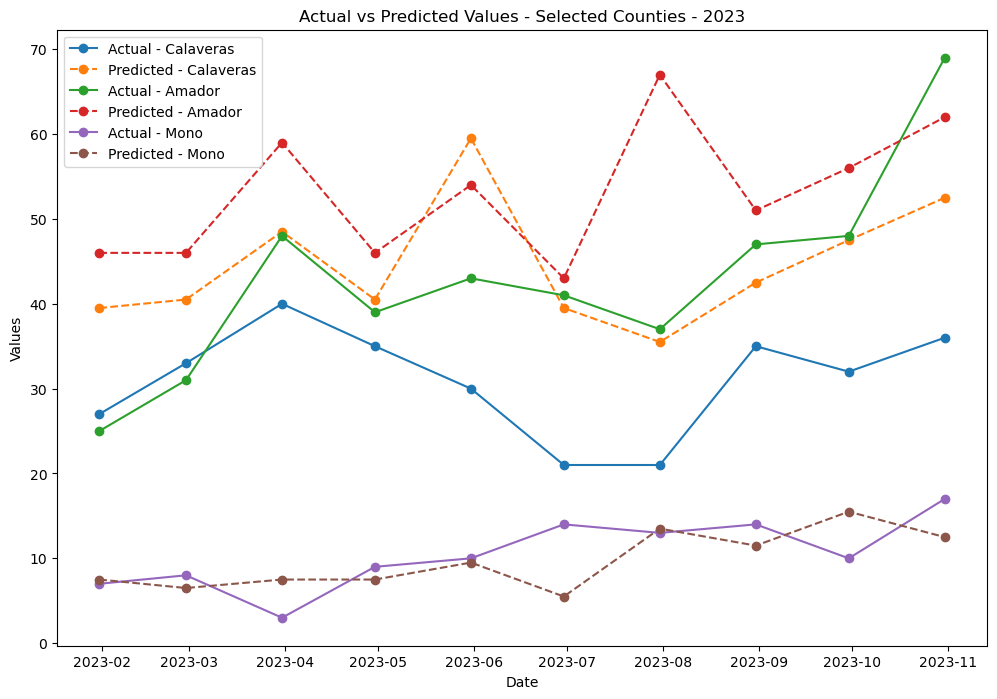

In [33]:
import matplotlib.pyplot as plt

# Specify the counties to include in the plot
counties_to_plot = [
    'Calaveras', 'Amador', 'Mono'
]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the predicted and actual values for specified counties
for county in counties_to_plot:
    # Plot actual values
    actual_values_2023 = df_pivot.loc[df_pivot.index.year == 2023, county]
    ax.plot(actual_values_2023.index, actual_values_2023, label=f'Actual - {county}', marker='o')

    # Plot predicted values
    forecast_values_2023 = forecast_results_2023[county]
    ax.plot(forecast_values_2023.index, forecast_values_2023, label=f'Predicted - {county}', linestyle='dashed', marker='o')

# Set plot labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Values')
ax.set_title('Actual vs Predicted Values - Selected Counties - 2023')

# Move legend to the side
#ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.legend()
# Show plot
plt.savefig('time_series.png', transparent=False)
plt.show()


In [92]:
# Assuming df_pivot is your DataFrame with counties as columns and months as rows

# Filter data for the year 2023
df_2023 = df_pivot[df_pivot.index.year == 2023]

# Calculate average counts for each county in 2023
average_counts_by_county_2023 = df_2023.mean()

# Print average counts for each county in 2023
print("Average counts for each county in 2023:")
for county, average_count in average_counts_by_county_2023.items():
    print(f"{county}: {average_count}")

Average counts for each county in 2023:
Monterey: 90.9
Santa Cruz: 195.0
Tulare: 153.5
Madera: 173.9
Calaveras: 31.0
San Francisco: 437.5
Marin: 120.2
Shasta: 182.9
Merced: 230.5
Santa Barbara: 298.0
Orange: 0.0
Sutter: 90.6
Kern: 629.3
Lake: 131.4
San Mateo: 362.8
Los Angeles: 0.0
Mono: 10.5
Placer: 253.3
Amador: 42.8
El Dorado: 0.0
Inyo: 26.0
Kings: 146.1
Humboldt: 112.8
Mendocino: 133.9
Napa: 132.7
Solano: 0.0
San Luis Obispo: 0.0
Riverside: 0.0
Yuba: 142.7
Fresno: 946.3
Siskiyou: 39.4
Mariposa: 19.9
Nevada: 73.0
Tehama: 31.4
Stanislaus: 582.4


In [93]:
counties_with_more_than_half_or_all_zeros = []

# Extract data for the year 2021
df_2023 = df_pivot[df_pivot.index.year == 2023]

for county in df_2023.keys():
    # Count the number of zeros in the forecast for 2023
    zero_count = (df_2023[county] == 0).sum()

    # Check if more than half or all of the values are zero
    if zero_count >= 6:
        counties_with_more_than_half_or_all_zeros.append(county)

# Print the counties with more than half or all zeros
print("Counties with more than half or all zeros in 2023:")
for county in counties_with_more_than_half_or_all_zeros:
    print(county)

Counties with more than half or all zeros in 2023:
Monterey
Tulare
Orange
Los Angeles
El Dorado
Solano
San Luis Obispo
Riverside


In [111]:
# Assuming rmse_scores_2023 contains the RMSE scores for 2023
counties_to_exclude = ['Monterey', 'Tulare', 'Orange', 'Los Angeles', 'El Dorado', 'Solano', 'San Luis Obispo', 'Riverside']

# Filter out the excluded counties
filtered_rmse_scores_2023 = {county: rmse for county, rmse in rmse_scores_2023.items() if county not in counties_to_exclude}

# Print RMSE scores for 2023 excluding specified counties
print("RMSE Scores for 2023 (Excluding specified counties):")
for county, rmse in filtered_rmse_scores_2023.items():
    print(f"{county}: {rmse}")

# Calculate average RMSE for 2023 excluding specified counties
average_rmse_2023_excluding = np.mean(list(filtered_rmse_scores_2023.values()))
print("Average RMSE for 2023 (Excluding specified counties):", average_rmse_2023_excluding)

RMSE Scores for 2023 (Excluding specified counties):
Santa Cruz: 104.11919428999542
Madera: 97.276427463177
Calaveras: 15.187172126500505
San Francisco: 221.2431545555469
Marin: 54.549540566345975
Shasta: 54.05460202424952
Merced: 113.32567150164157
Santa Barbara: 163.95507111094673
Sutter: 50.09592024306664
Kern: 361.62962895270664
Lake: 62.10718704948111
San Mateo: 413.46183320481316
Mono: 3.9306484452319648
Placer: 120.33081812527769
Amador: 14.106741764134707
Inyo: 9.728826817761064
Kings: 77.75347082156279
Humboldt: 83.37415986982863
Mendocino: 101.98285876164965
Napa: 48.27527850981047
Yuba: 57.54391425684706
Fresno: 527.0643006355707
Siskiyou: 25.812791898590728
Mariposa: 14.384022194781437
Nevada: 47.00213505788695
Tehama: 56.82077774018777
Stanislaus: 279.5773138342071
Average RMSE for 2023 (Excluding specified counties): 117.72938747488145


The Average RMSE (Root Mean Squared Error) for 2023 is a metric that quantifies the accuracy of your forecasting model.

- Magnitude: The RMSE is measured in the same units as the data you are forecasting. In this case, it is 117.73. It represents the average difference between the actual values and the predicted values for the specified counties in the year 2023.

- Accuracy: A lower RMSE indicates better accuracy. Therefore, an RMSE of 117.73 suggests that, on average, your model's predictions for the specified counties in 2023 are off by approximately 117.73 units.

- Excluding specified counties: The fact that you excluded specific counties (Monterey, Tulare, Orange, Los Angeles, El Dorado, Solano, San Luis Obispo, Riverside) from the calculation suggests that these counties might have peculiar characteristics or data patterns that are challenging for the model to predict accurately.

    - Since the raw data for the specified counties is not available or has missing records, attempting to forecast for these counties could lead to artificially high RMSE values. This is because the model is being evaluated against ground truth data that is not present or incomplete.
    - In such cases, excluding these counties from the RMSE calculation provides a more accurate assessment of the model's performance on the available and complete data. It helps avoid penalizing the model for its inability to predict values for regions where there is no or insufficient historical data.

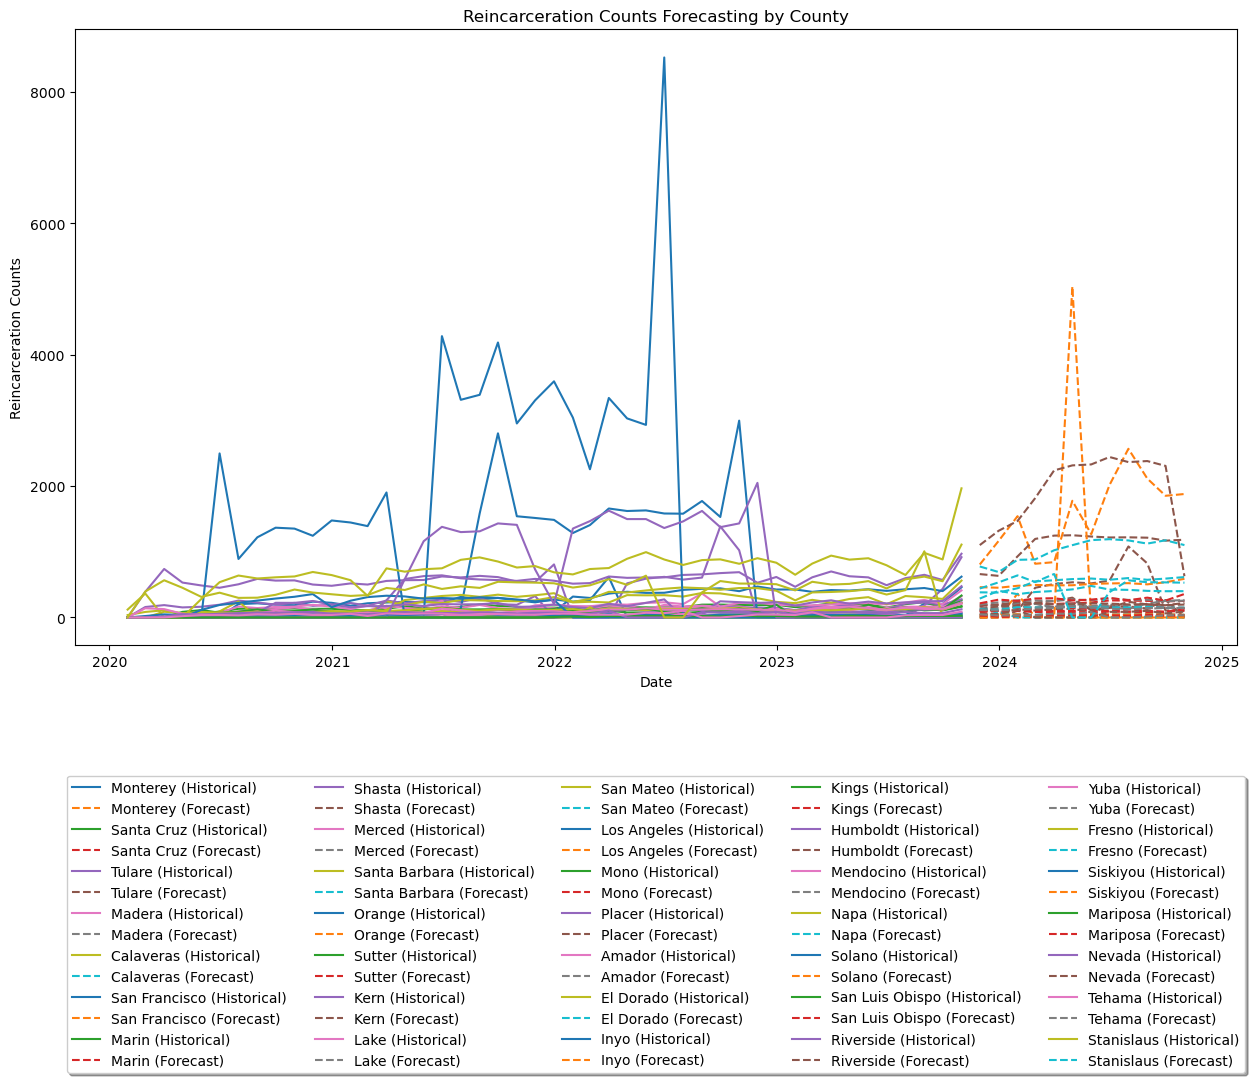

In [84]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", message="Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.", category=UserWarning)
warnings.filterwarnings("ignore", message="Non-invertible starting MA parameters found. Using zeros as starting parameters.", category=UserWarning)
warnings.filterwarnings("ignore", message="Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.", category=UserWarning)
# Suppress all warnings
warnings.filterwarnings("ignore")

# Assuming df_pivot is your DataFrame with counties as columns and months as rows

# Train-Test Split
train_size = int(len(df_pivot) * 0.8)
train, test = df_pivot[:train_size], df_pivot[train_size:]

# Model Training and Forecasting for each county
forecast_results = {}
for county in df_pivot.columns:
    model = ARIMA(train[county], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    fit_model = model.fit()

    # Forecasting beyond October 2023
    forecast_horizon = 12
    forecast = fit_model.get_forecast(steps=forecast_horizon)
    forecast_values = forecast.predicted_mean

    # Set negative predictions to zero
    forecast_values = forecast_values.apply(lambda x: max(x, 0))

    # Save forecast results
    forecast_results[county] = forecast_values

# Create forecast_index based on the forecasted time steps
forecast_index = pd.date_range(df_pivot.index[-1], periods=forecast_horizon + 1, freq='M')[1:]

# Visualization
plt.figure(figsize=(15, 8))
for county in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[county], label=county + ' (Historical)')
    plt.plot(forecast_index, forecast_results[county], linestyle='dashed', label=county + ' (Forecast)')

plt.title('Reincarceration Counts Forecasting by County')
plt.xlabel('Date')
plt.ylabel('Reincarceration Counts')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=5)

plt.show()

### The algorithm predicts next year re-incarceration counts as follow

In [29]:
display(forecast_results)

{'Monterey': 2023-01-31      0.000000
 2023-02-28      2.510469
 2023-03-31    361.661472
 2023-04-30      0.000000
 2023-05-31      0.000000
 2023-06-30      0.000000
 2023-07-31      0.000000
 2023-08-31      0.000000
 2023-09-30      0.000000
 2023-10-31      0.000000
 2023-11-30      0.000000
 2023-12-31      0.000000
 Freq: M, Name: predicted_mean, dtype: float64,
 'Santa Cruz': 2023-01-31    175.594433
 2023-02-28    198.569267
 2023-03-31    204.644142
 2023-04-30    208.019297
 2023-05-31    205.810815
 2023-06-30    215.798019
 2023-07-31    227.745761
 2023-08-31    259.355536
 2023-09-30    256.365954
 2023-10-31    252.484751
 2023-11-30    245.578907
 2023-12-31    251.356587
 Freq: M, Name: predicted_mean, dtype: float64,
 'Tulare': 2023-01-31       0.000000
 2023-02-28       0.000000
 2023-03-31     101.591907
 2023-04-30     452.105667
 2023-05-31     509.224966
 2023-06-30     535.308798
 2023-07-31     518.959088
 2023-08-31     559.412741
 2023-09-30    1080.737964
 

### Interpretation

In attempting to construct a predictive model for next year's re-incarceration counts, a critical consideration arises regarding the choice between time series analysis and machine learning approaches. Time series models excel when the primary focus is on capturing and forecasting patterns inherent in the sequential nature of the data, such as trends, seasonality, and cyclicality. These models work most effectively when the dataset consists of individual counts for each county across various time frames, allowing for the isolation of temporal patterns specific to each jurisdiction. On the other hand, machine learning models, by their nature, can incorporate a diverse set of variables beyond time, providing a comprehensive approach to prediction. While time series models are adept at uncovering temporal intricacies, machine learning models offer the advantage of considering additional factors, such as demographics, socio-economic indicators, and other contextual variables, to build a more holistic predictive framework. The choice between these approaches depends on the specific objectives of the analysis and the nature of the available data.

Counties with more than half or all zeros in 2023:
Monterey
El Dorado
Solano
